In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import os
os.listdir('/kaggle/input/')

['virat-kohli-odi', 'sachin-odi']

In [2]:
sachin_data = pd.read_csv('//kaggle//input//sachin-odi//Sachin_ODI.csv')
virat_data = pd.read_csv('//kaggle//input//virat-kohli-odi//Virat_ODI.csv')

In [3]:
virat_data = virat_data[(virat_data.runs != 'DNB') & (virat_data.runs != 'TDNB')]
virat_data['runs'] = virat_data.runs.astype('int32')
virat_data['bf'] = virat_data.bf.astype('int32')
virat_data['fours'] = virat_data.fours.astype('int32')
virat_data['sixes'] = virat_data.sixes.astype('int32')
virat_data['Inns'] = virat_data.Inns.astype('int32')
virat_data['Date'] = pd.to_datetime(virat_data['Date'], format = '%d %b %Y')

In [4]:
#Cleaning and Processing Sachin data
sachin_data = sachin_data[(sachin_data.runs != 'DNB') & (sachin_data.runs != 'TDNB')]
sachin_data['runs'] = sachin_data.runs.astype('int32')
sachin_data['bf'] = sachin_data.bf.astype('int32')
sachin_data['fours'] = sachin_data.fours.astype('int32')
sachin_data['sixes'] = sachin_data.sixes.astype('int32')
sachin_data['sr'] = sachin_data.sr.astype('float')
sachin_data['Inns'] = sachin_data.Inns.astype('int32')
sachin_data['Date'] = pd.to_datetime(sachin_data['Date'], format = '%d %b %Y')

#Cleaning and Processing Virat data
virat_data = virat_data[(virat_data.runs != 'DNB') & (virat_data.runs != 'TDNB')]
virat_data['runs'] = virat_data.runs.astype('int32')
virat_data['bf'] = virat_data.bf.astype('int32')
virat_data['fours'] = virat_data.fours.astype('int32')
virat_data['sixes'] = virat_data.sixes.astype('int32')
virat_data['Inns'] = virat_data.Inns.astype('int32')
virat_data['Date'] = pd.to_datetime(virat_data['Date'], format = '%d %b %Y')

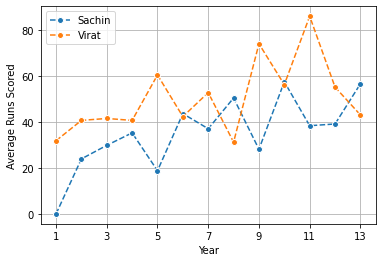

In [5]:
# Average Runs scored each year by Virat and Sachin 

sachin_avgRunsPerYear = np.array(sachin_data.groupby(sachin_data.Date.map(lambda x:x.year)).runs.mean())
virat_avgRunsPerYear = np.array(virat_data.groupby(virat_data.Date.map(lambda x:x.year)).runs.mean())

plt.plot(np.arange(1,14,1),sachin_avgRunsPerYear[:13],label='Sachin', linestyle='dashed', marker='o',markeredgecolor='white', markersize=6)
plt.plot(np.arange(1,14,1),virat_avgRunsPerYear,label='Virat',linestyle='dashed', marker='o', markeredgecolor='white',markersize=6)

plt.xlabel('Year',fontsize = 10)
plt.ylabel('Average Runs Scored',fontsize = 10)
plt.xticks(np.arange(1,14,2),fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
plt.grid()
plt.show()


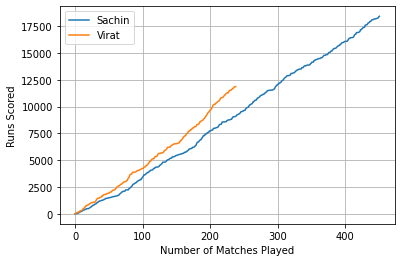

In [6]:
#Number of Runs scored by Virat and Sachin vs Number of Matches Played

sachin_runs = np.array(sachin_data.runs)
virat_runs = np.array(virat_data.runs)
for i in range(1,len(sachin_runs)):
	sachin_runs[i] = sachin_runs[i] + sachin_runs[i-1]
for i in range(1,len(virat_runs)):
	virat_runs[i] = virat_runs[i] + virat_runs[i-1]


plt.plot(sachin_runs,label='Sachin')
plt.plot(virat_runs,label='Virat')
plt.xlabel('Number of Matches Played',fontsize = 10)
plt.ylabel('Runs Scored',fontsize = 10)
plt.legend()
plt.grid()
plt.show()
plt.show()

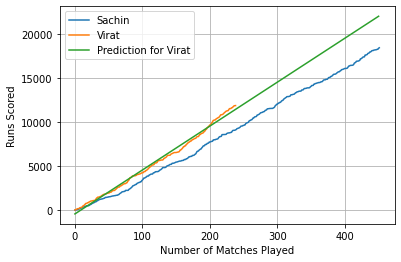

In [7]:
# Fitting a linear Regression Model to Runs Scored by virat

from sklearn.linear_model import LinearRegression
y = np.arange(0,len(virat_runs))
y=y.reshape(-1,1)
virat_runs = virat_runs.reshape(-1,1)
reg = LinearRegression()
reg.fit(y,virat_runs)

y_test = np.arange(1,len(sachin_runs))
y_test = y_test.reshape(-1,1)
predictions = reg.predict(y_test)

plt.plot(sachin_runs,label='Sachin')
plt.plot(virat_runs,label='Virat')
plt.plot(predictions, label='Prediction for Virat')
plt.xlabel('Number of Matches Played',fontsize = 10)
plt.ylabel('Runs Scored',fontsize = 10)
plt.legend()
plt.grid()
plt.show()


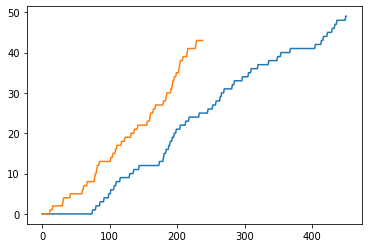

In [8]:
# Number of Centuries made vs Number of Matches Played

sachin_runs = np.array(sachin_data.runs)
sachin_centuries = sachin_runs
sachin_centuries[0] = 0
if(sachin_runs[0]>=100):
	sachin_centuries[0] = 1
for i in range (1,len(sachin_runs)):
	if(sachin_runs[i] >= 100 ):
		sachin_centuries[i] = sachin_centuries[i-1] + 1
	else:
		sachin_centuries[i] = sachin_centuries[i-1]

virat_runs = np.array(virat_data.runs)
virat_centuries = virat_runs
virat_centuries[0] = 0
if(virat_runs[0]>=100):
	virat_centuries[0] = 1
for i in range (1,len(virat_runs)):
	if(virat_runs[i] >= 100 ):
		virat_centuries[i] = virat_centuries[i-1] + 1
	else:
		virat_centuries[i] = virat_centuries[i-1]

plt.plot(sachin_centuries)
plt.plot(virat_centuries)
plt.show()

# **THANK YOU**